In [2]:
'''Define problem
select the variables
data collection and preprocessing
model selection
data trnasformation
model training
model evaluation
prediction
evaluation
'''

'Define problem\nselect the variables\ndata collection and preprocessing\nmodel selection\ndata trnasformation\nmodel training\nmodel evaluation\nprediction\nevaluation\n'

In [35]:
import numpy as np
X = np.array([[23], [28], [35], [40], [42], [45], [48], [50], [53], [55],[58], [60], [62], [65], [68], [70], [73], [75], [78], [80]])
Y = np.array([100, 110, 120,125, 130, 140, 145, 150, 155, 160,165, 170, 175, 180, 185, 190, 200, 210, 215, 220, 300])

<function matplotlib.pyplot.show(close=None, block=None)>

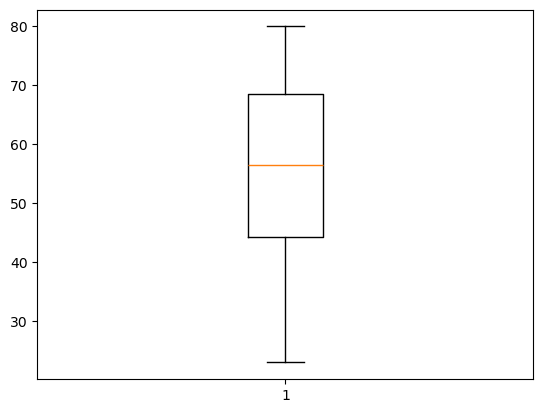

In [36]:
import matplotlib.pyplot as plt
plt.boxplot(X)
plt.show

In [37]:
import pandas as pd
X=pd.DataFrame(X,columns=['blood_sugar'])

<function matplotlib.pyplot.show(close=None, block=None)>

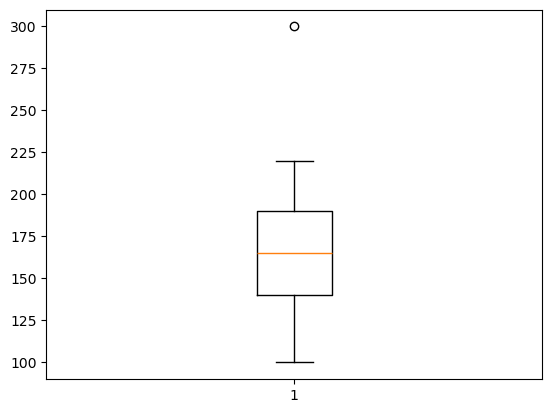

In [38]:
import matplotlib.pyplot as plt
plt.boxplot(Y)
plt.show

In [39]:
Q1 = np.percentile(Y,25)
Q1
Q3 = np.percentile(Y,75)
Q3
IQR = Q3-Q1
IQR
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
outliers = Y[(Y < lower_bound) | (Y > upper_bound)]
outliers

array([300])

In [43]:
index_to_remove = np.where(Y == 300)[0]
if len(index_to_remove) > 0:
    Y = np.delete(Y, index_to_remove)
print(Y)

[100 110 120 125 130 140 145 150 155 160 165 170 175 180 185 190 200 210
 215 220]


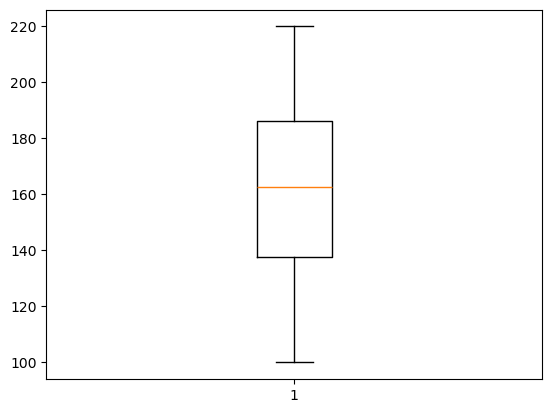

In [46]:
plt.boxplot(Y)
plt.show()

In [47]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X,Y)

LinearRegression()

In [48]:
Y_pred=LR.predict(X)
Y_pred

array([ 93.6422114 , 104.2298331 , 119.05250348, 129.64012517,
       133.87517385, 140.22774687, 146.58031989, 150.81536857,
       157.16794159, 161.40299026, 167.75556328, 171.99061196,
       176.22566064, 182.57823366, 188.93080668, 193.16585535,
       199.51842837, 203.75347705, 210.10605007, 214.34109875])

In [49]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(Y,Y_pred)
mse
rmse = np.sqrt(mse)
rmse

3.615578736061774

In [50]:
r2 = r2_score(Y, Y_pred)
print("R²:", r2)

R²: 0.9888621037570375


In [51]:
def sug():
    details = int(input('Enter your age: '))
    details = np.array([[details]])
    result = LR.predict(details)
    print(f'based on your age {details} your sugar levels are {result}')
    print('-' * 120)
    print('-' * 120)
    if result <= 120 :
        print(f'You have an LOW sugar levels {result}')
    elif result >= 120 and result <= 160:
        print(f'You have an NORMAL sugar levels {result}')
    elif result >= 160:
        print(f'You have an HIGH sugar levels {result}')
sug()


Enter your age:  25


based on your age [[25]] your sugar levels are [97.87726008]
------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
You have an LOW sugar levels [97.87726008]


C:\Users\sanna\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'BloodSugarLevels')

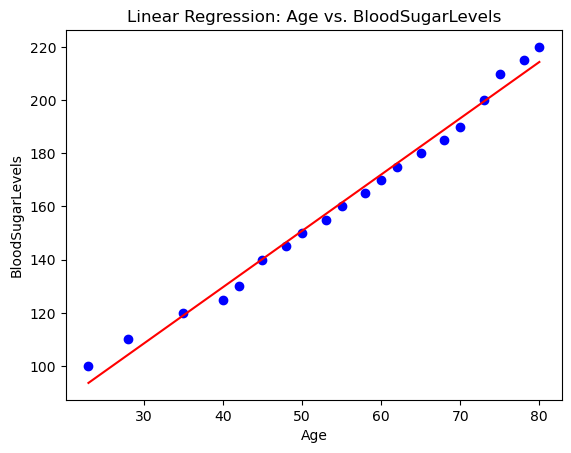

In [52]:
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.title('Linear Regression: Age vs. BloodSugarLevels')
plt.xlabel('Age')
plt.ylabel('BloodSugarLevels')

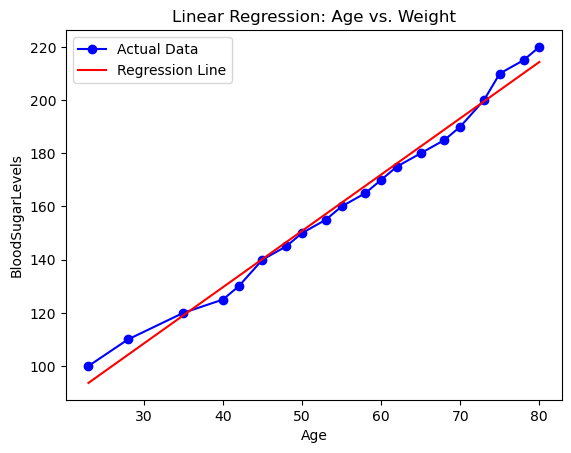

In [53]:
plt.plot(X, Y, color='blue', marker='o', label='Actual Data')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.title("Linear Regression: Age vs. Weight")
plt.xlabel("Age")
plt.ylabel("BloodSugarLevels")
plt.legend()
plt.show()